In [ ]:
import requests
from dotenv import load_dotenv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

load_dotenv()
api_key = os.getenv("ALPHA_API_KEY")
symbol = "AAPL"


url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey={api_key}"
data = requests.get(url).json()
data



#ibm_data = pd.DataFrame(data)
#ibm_data.head()



In [15]:
apple_data = pd.DataFrame(data["Time Series (Daily)"]).transpose().astype(float)
apple_data.index

Index(['2021-10-29', '2021-10-28', '2021-10-27', '2021-10-26', '2021-10-25',
       '2021-10-22', '2021-10-21', '2021-10-20', '2021-10-19', '2021-10-18',
       ...
       '1999-11-12', '1999-11-11', '1999-11-10', '1999-11-09', '1999-11-08',
       '1999-11-05', '1999-11-04', '1999-11-03', '1999-11-02', '1999-11-01'],
      dtype='object', length=5536)

In [19]:
apple_data.index = pd.to_datetime(apple_data.index)
apple_data.head()

,1. open,2. high,3. low,4. close,5. volume
2021-10-29,147.215,149.940,146.4128,149.80,124953168.0
2021-10-28,149.820,153.165,149.7200,152.57,100077888.0
2021-10-27,149.360,149.730,148.4900,148.85,56094929.0
2021-10-26,149.330,150.840,149.0101,149.32,60893395.0
2021-10-25,148.680,149.370,147.6211,148.64,50720556.0


In [24]:
apple_data.loc["2021-10-20" : "2021-10-29" ]

,1. open,2. high,3. low,4. close,5. volume
2021-10-29,147.215,149.940,146.4128,149.80,124953168.0
2021-10-28,149.820,153.165,149.7200,152.57,100077888.0
2021-10-27,149.360,149.730,148.4900,148.85,56094929.0
2021-10-26,149.330,150.840,149.0101,149.32,60893395.0
2021-10-25,148.680,149.370,147.6211,148.64,50720556.0
2021-10-22,149.690,150.180,148.6400,148.69,58883443.0
2021-10-21,148.810,149.640,147.8700,149.48,61420990.0


In [30]:
import requests
from dotenv import load_dotenv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import time


load_dotenv()
api_key = os.getenv("ALPHA_API_KEY")
symbols = ["AAPL", "TSLA", "NVDA", "IBM"]
stock_list = []
for symbol in symbols:
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey={api_key}"
    data = requests.get(url).json()
    df = pd.DataFrame(data["Time Series (Daily)"]).transpose()
    df = df["4. close"].rename(symbol).astype(float)
    stock_list.append(df)
    time.sleep(20)



#fig, axes = plt.subplot()
#apple_kurs = sns.lineplot(apple_data, y="4.close", x= apple_data.index)

In [31]:
stocks = pd.concat(stock_list, axis = 1)
stocks.to_csv("stocks.csv")

In [33]:
all_stocks = pd.read_csv("stocks.csv", index_col = 0, parse_dates=True)

In [35]:
all_stocks.loc["2020"]

,AAPL,TSLA,NVDA,IBM
2020-12-31,132.69,705.67,522.20,125.88
2020-12-30,133.72,694.78,525.83,124.34
2020-12-29,134.87,665.99,517.73,123.80
2020-12-28,136.69,663.69,516.00,124.82
2020-12-24,131.97,661.77,519.75,124.69
...,...,...,...,...
2020-01-08,303.19,492.14,240.38,135.31
2020-01-07,298.39,469.06,239.93,134.19
2020-01-06,299.80,451.54,237.06,134.10
2020-01-03,297.43,443.01,236.07,134.34


/var/folders/f7/yr1v3cr12blbcs1mz2hr4b_m0000gn/T/ipykernel_19295/662830203.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  stock_2021 = all_stocks["2021"]


Text(0.5, 1.03, 'Stock during 2021')

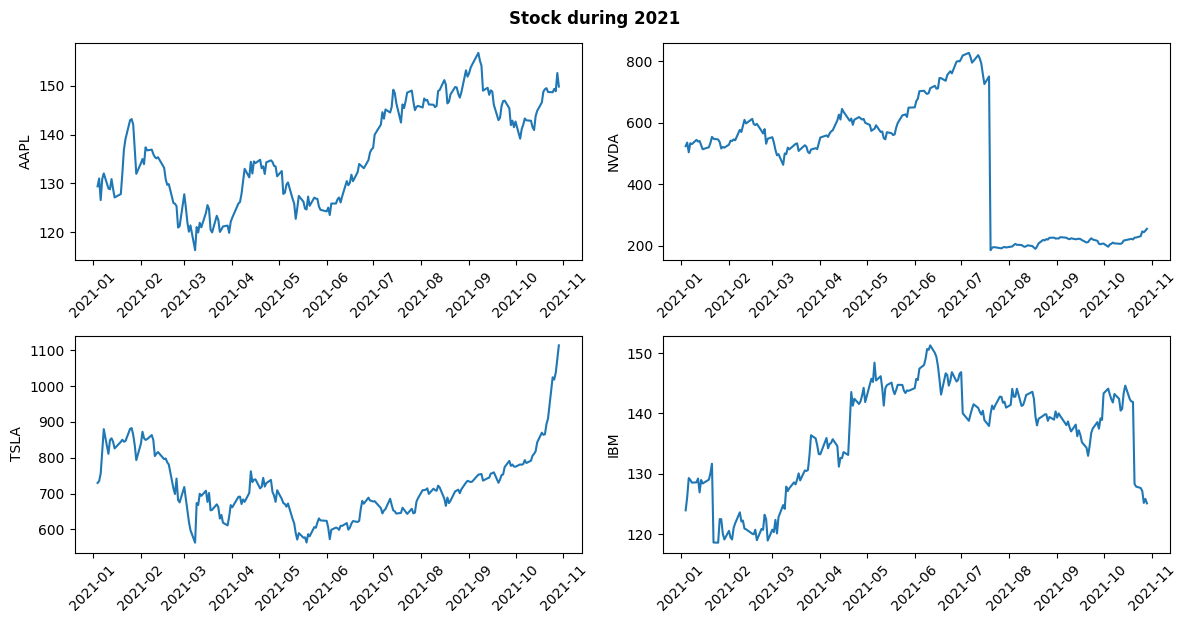

In [43]:
fig, axes = plt.subplots(2,2, dpi = 100, figsize = (12,6))
axes.flatten()

stock_2021 = all_stocks["2021"]

stock_names = dict(AAPL = "Apple", NVDA = "Nvidia", TSLA = "Tesla", IBM = "IBM")
for ax, symbol in zip(axes.flatten(), stock_names):
    sns.lineplot(data = stock_2021, x = stock_2021.index, y = symbol, ax = ax)
    ax.tick_params(axis = "x", rotation = 45)

fig.tight_layout()
fig.suptitle("Stock during 2021", y = 1.03, fontweight = "bold")
plt.savefig("stocks2021.png", facecolor="white")
